In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import ConvexHull
import progressbar

In [2]:
def point_in_hull(point, hull, tolerance=1e-6):
    return np.all( np.dot( hull.equations[:,:-1], point ) + hull.equations[:,-1] <= tolerance )
    #return all(
    #    (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
    #    for eq in hull.equations
    #)

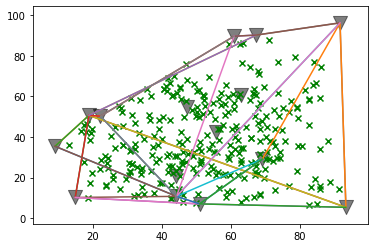

In [3]:
points = np.random.uniform(0, 100, (15, 3))
hull = ConvexHull(points)

#np.random.seed(1)
random_points = np.random.uniform(0, 100, (1000, 3))

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1])

plt.scatter(*points.T[:2], alpha=.5, color='k', s=200, marker='v')

for p in random_points:
    point_is_in_hull = point_in_hull(p, hull)
    marker = 'x' if point_is_in_hull else 'd'
    color = 'g' if point_is_in_hull else 'm'
    
    if not point_is_in_hull:
        continue
    plt.scatter(p[0], p[1], marker=marker, color=color)

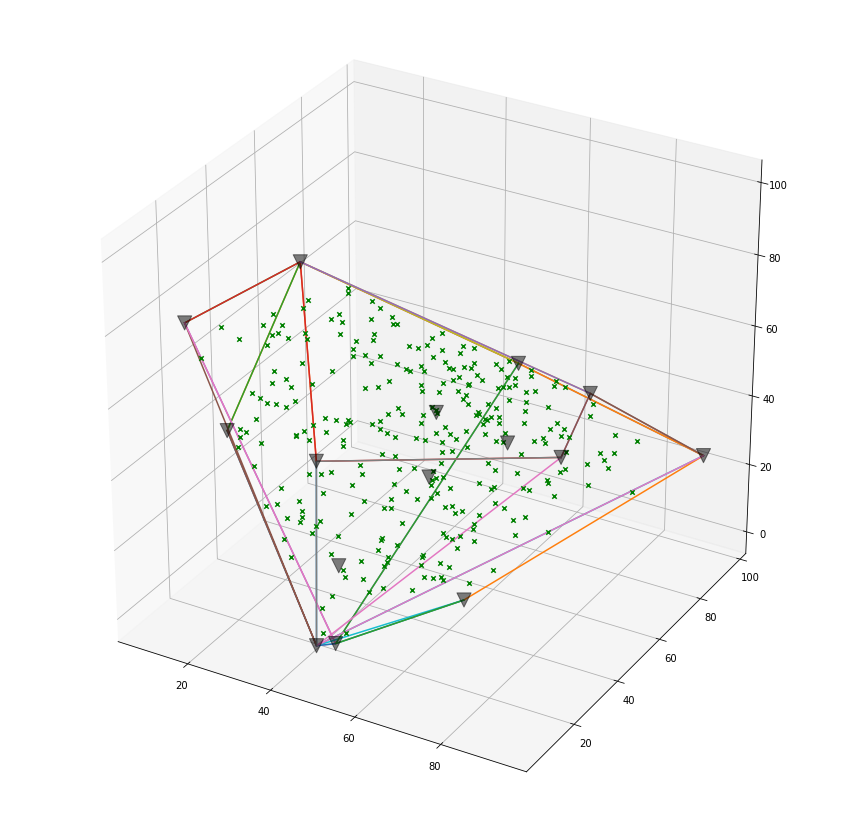

In [4]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2])
    
ax.scatter(*points.T, alpha=.5, color='k', s=200, marker='v')

for p in random_points:
    point_is_in_hull = point_in_hull(p, hull)
    marker = 'x' if point_is_in_hull else 'd'
    color = 'g' if point_is_in_hull else 'm'
    
    if not point_is_in_hull:
        continue
    ax.scatter(p[0], p[1], p[2], marker=marker, color=color)

In [5]:
out = np.zeros( (1000,1000,1000), dtype=np.uint8)

In [6]:
import mask_accelerated

In [7]:
%%timeit

mask_accelerated.mask_array( out, np.array(out.shape), hull.equations, len(hull.equations) )

269 ms ± 40.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
for i,j,k in list( zip( *points.T ) ):
    i,j,k = int(i),int(j),int(k)
    out[i][j][k] = 5

In [9]:
import tifffile
tifffile.imwrite( 'test.tif', out )

In [10]:
hull.volume

264069.3454867569

In [11]:
sum( sum( sum( out == 1 ) ) )

263952

In [12]:
(100**3)

1000000